## 什么是集成学习

集成学习是一类提升方法。**“团结就是力量”**就是他的宗旨。

**通过结合多个模型，可以产生一个更强大的模型。**是他的基本指导思想。

集成学习是在Kaggle或者天池等比赛中，想要达到最高名次时，几乎必用的手段。最朴素的想法是投票voting。Voting是最朴素的方法。鉴于过于简单朴素，效果提升有限，用得很少。

集成学习主要包括三大方法：
- Bagging
- Boosting
- Stacking

🌰：
Bagging：随机森林
Boosting：Adaboost
Stacking：Stacking的方法更加灵活，可以自定义层数、数据重采样方法。

### 集成学习的特点

集成学习的特点是**使用多个模型**，与之相伴的另一个特点是**对数据集的各种使用方法**。

### 设计一个集成学习模型时需要关注的问题：

1. 如何设计弱学习器

> 通常这些学习器的形式是一致的

2. 如何把这些弱学习器结合在一起

> 结合多个学习器的算法成为Meta-Algorithms，这个算法为了产生更好的效果，调用其他算法（若分类器）作为输入。

> what is meta-algorithms：
Loosely speaking, a meta-algorithm is an algorithm that wraps and executes other algorithms and might feed them input data or use their output data. A common goal is to achieve a better task performance compared to the performance of each of those algorithms on their own.



------

### 1. Bagging

#### 1.1 Booststrap

Bagging的全称是“**B**ootstrap **AGG**regat**ING**”。

Booststrap是一个重采样方法：通过从原始的$N$个样本数据$D=\{x_1,x_2,\dots,x_N\}$，进行$N$次有放回采样$N$个数据 ，称为一个bootstrap样本。
Booststrap通过**有放回的采样**，得到和原来的数据集大小不变的新数据集，其中几乎必然会有重复，所以这个操作等价于给样本reweighting。

#### 1.2 Bagging的算法过程

设基学习器的个数为$M$个，那么就从数据集中进行$M$次Booststrap。用这$M$个数据集训练可以得到$M$个模型。
对这$M$个模型按如下方式投票:
$$f_{avg}(x)=\frac{1}{N}\sum_{m=1}^Mf_m(x)$$

**可以证明：Bagging可以降低模型的方差。**

#### 1.3 Bagging具有降低模型方差的功效

对于M个模型，每个模型会产生一个“样本”X，这些样本都是从一个均值为$\mu$，方差为$\sigma$的分布中产生的。

这些样本的均值为$\hat{X}$可以看成另一个新的样本，该样本服从均值为$\mu$、方差为$\frac{\sigma^2}{M}$的分布（通过简单的概率公式就可以推导出来）。

由此，可以对Bagging做出两个结论：
1. 样本均值$\hat{X}$的期望和$X$的期望相等（无偏估计）
2. 样本均值$\hat{X}$的方差比$X$的方差小，且样本数（模型数量）越大，方差就越小。

因此Bagging可以降低模型方差，且不改变模型偏差。因此Bagging适用于偏差低、方差高的模型。例如决策树、神经网络。决策树+Bagging就是随机森林了。另外在sklearn中支持对任意的基学习器的Bagging。
>- 分类：BaggingClassifier
>- 回归：BaggingRegressor

Bagging的每个基学习器只在原始数据集的一部分上训练，所以可以不用交叉验证，直接用包外样本上的误差 （out-of-bag error）来估计它的泛化误差/测试误差。
<img src="./images/Bagging.png" alt="SVM " style="zoom:28%;" />


另外，以上计算是在各个模型之间相互独立的情况下进行的。但是真实情况下并不独立，因为他们会公用许多的数据。所以降低方差的性能会大打折扣。其折扣力度是这么计算的：假设$f_m(x)$之间的相关性是$\rho$，则$f_{avg}(x)$的方差为$\rho x \sigma^2 + (1-\rho)x\frac{\sigma^2}{M}$


还有一点，参数基学习器数目n_estimators不是模型复杂度参数，无需通过交叉验证来确定。参数值建议：

- 对分类问题，可设置基学习器数目为$\sqrt{D}$， 其中$D$为特征数目；

- 对回归问题，可设置基学习器数目为$\frac{D}{3}$。

#### 1.4 随机森林

由于仅训练数据有些不同，对决策树算法进行Bagging得到的多棵树高度相关，因此带来的方差减少有限。

随机森林通过以下两个方法来降低树之间的相关性：

• 随机选择一部分特征

• 随机选择一部分样本


随机森林在很多应用案例被证明有效，但牺牲了可解释性

• 森林：多棵树

• 随机：对样本和特征进行随机抽取

### 2. Boosting

学习一个强分类器很难，但是学习一个若分类器很简单。通过学习**一系列**的弱分类器，他们相互结合达到强分类器的效果。需要注意的是，分类器的学习是有顺序的。

例如先学习一个弱分类器$\phi_1$，再学习第二个弱分类器$\phi_2$。第二个分类器帮助第一个分类器（和第一个分类器互补）。然后再训练第三个弱分类器...一直这么训练下去。

最后组合所有M个弱分类器：
$$f(x) = \sum_{m=1}^M\alpha_m\phi_m(x)$$

有各种各样的Boosting，例如Adaboost、FilterBoost、GentleBoost、GradientBoost、MadaBoost、LogitBoost、LPBoost等等。他们的不同点就是在于**如何设计弱分类器**和**如何把弱分类器结合起来**这两点上。


#### 2.1 Adaboost
AdaBoost是AdaptiveBoost的缩写，表明该算法是具有适应性的提升算法。

算法的步骤如下：

1）给每个训练样本（$x_{1},x_{2},….,x_{N}$）分配权重，初始权重$w_{1}$均为1/N。

2）针对带有权值的样本进行训练，得到模型$G_m$（初始模型为G1）。

3）计算模型$G_m$的误分率$e_m=\sum_{i=1}^Nw_iI(y_i\not= G_m(x_i))$

4）计算模型$G_m$的系数$\alpha_m=0.5\log[(1-e_m)/e_m]$

5）根据误分率e和当前权重向量$w_m$更新权重向量$w_{m+1}$。

6）计算组合模型$f(x)=\sum_{m=1}^M\alpha_mG_m(x_i)$的误分率。

7）当组合模型的误分率或迭代次数低于一定阈值，停止迭代；否则，回到步骤2）

## 产生数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i,-1] == 0:
            data[i,-1] = -1
    # print(data)
    return data[:,:2], data[:,-1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

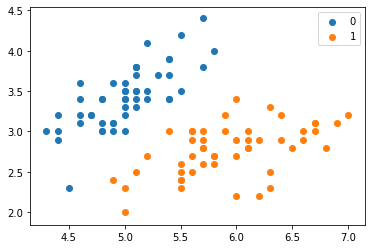

In [4]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

## Adaboost in Python

In [5]:
class AdaBoost:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.clf_num = n_estimators
        self.learning_rate = learning_rate

    def init_args(self, datasets, labels):

        self.X = datasets
        self.Y = labels
        self.M, self.N = datasets.shape

        # 弱分类器数目和集合
        self.clf_sets = []

        # 初始化weights
        self.weights = [1.0 / self.M] * self.M

        # G(x)系数 alpha
        self.alpha = []

    def _G(self, features, labels, weights):
        m = len(features)
        error = 100000.0  # 无穷大
        best_v = 0.0
        # 单维features
        features_min = min(features)
        features_max = max(features)
        n_step = (features_max - features_min +
                  self.learning_rate) // self.learning_rate
        # print('n_step:{}'.format(n_step))
        direct, compare_array = None, None
        for i in range(1, int(n_step)):
            v = features_min + self.learning_rate * i

            if v not in features:
                # 误分类计算
                compare_array_positive = np.array(
                    [1 if features[k] > v else -1 for k in range(m)])
                weight_error_positive = sum([
                    weights[k] for k in range(m)
                    if compare_array_positive[k] != labels[k]
                ])

                compare_array_nagetive = np.array(
                    [-1 if features[k] > v else 1 for k in range(m)])
                weight_error_nagetive = sum([
                    weights[k] for k in range(m)
                    if compare_array_nagetive[k] != labels[k]
                ])

                if weight_error_positive < weight_error_nagetive:
                    weight_error = weight_error_positive
                    _compare_array = compare_array_positive
                    direct = 'positive'
                else:
                    weight_error = weight_error_nagetive
                    _compare_array = compare_array_nagetive
                    direct = 'nagetive'

                # print('v:{} error:{}'.format(v, weight_error))
                if weight_error < error:
                    error = weight_error
                    compare_array = _compare_array
                    best_v = v
        return best_v, direct, error, compare_array

    # 计算alpha
    def _alpha(self, error):
        return 0.5 * np.log((1 - error) / error)

    # 规范化因子
    def _Z(self, weights, a, clf):
        return sum([
            weights[i] * np.exp(-1 * a * self.Y[i] * clf[i])
            for i in range(self.M)
        ])

    # 权值更新
    def _w(self, a, clf, Z):
        for i in range(self.M):
            self.weights[i] = self.weights[i] * np.exp(
                -1 * a * self.Y[i] * clf[i]) / Z

    # G(x)的线性组合
    def _f(self, alpha, clf_sets):
        pass

    def G(self, x, v, direct):
        if direct == 'positive':
            return 1 if x > v else -1
        else:
            return -1 if x > v else 1

    def fit(self, X, y):
        self.init_args(X, y)

        for epoch in range(self.clf_num):
            best_clf_error, best_v, clf_result = 100000, None, None
            # 根据特征维度, 选择误差最小的
            for j in range(self.N):
                features = self.X[:, j]
                # 分类阈值，分类误差，分类结果
                v, direct, error, compare_array = self._G(
                    features, self.Y, self.weights)

                if error < best_clf_error:
                    best_clf_error = error
                    best_v = v
                    final_direct = direct
                    clf_result = compare_array
                    axis = j

                # print('epoch:{}/{} feature:{} error:{} v:{}'.format(epoch, self.clf_num, j, error, best_v))
                if best_clf_error == 0:
                    break

            # 计算G(x)系数a
            a = self._alpha(best_clf_error)
            self.alpha.append(a)
            # 记录分类器
            self.clf_sets.append((axis, best_v, final_direct))
            # 规范化因子
            Z = self._Z(self.weights, a, clf_result)
            # 权值更新
            self._w(a, clf_result, Z)


#             print('classifier:{}/{} error:{:.3f} v:{} direct:{} a:{:.5f}'.format(epoch+1, self.clf_num, error, best_v, final_direct, a))
#             print('weight:{}'.format(self.weights))
#             print('\n')

    def predict(self, feature):
        result = 0.0
        for i in range(len(self.clf_sets)):
            axis, clf_v, direct = self.clf_sets[i]
            f_input = feature[axis]
            result += self.alpha[i] * self.G(f_input, clf_v, direct)
        # sign
        return 1 if result > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            feature = X_test[i]
            if self.predict(feature) == y_test[i]:
                right_count += 1

        return right_count / len(X_test)

In [6]:
X = np.arange(10).reshape(10, 1)
y = np.array([1, 1, 1, -1, -1, -1, 1, 1, 1, -1])

clf = AdaBoost(n_estimators=3, learning_rate=0.5)
clf.fit(X, y)

X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = AdaBoost(n_estimators=10, learning_rate=0.2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7575757575757576

In [7]:
# 100次结果
result = []
for i in range(1, 101):
    X, y = create_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    clf = AdaBoost(n_estimators=100, learning_rate=0.2)
    clf.fit(X_train, y_train)
    r = clf.score(X_test, y_test)
    # print('{}/100 score：{}'.format(i, r))
    result.append(r)

print('average score:{:.3f}%'.format(sum(result)))

average score:67.576%


## Implements with sklearn

-----
#### sklearn.ensemble.AdaBoostClassifier

- algorithm：这个参数只有AdaBoostClassifier有。主要原因是scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME使用了和我们的原理篇里二元分类Adaboost算法的扩展，即用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。


- n_estimators： AdaBoostClassifier和AdaBoostRegressor都有，就是我们的弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。


-  learning_rate:  AdaBoostClassifier和AdaBoostRegressor都有，即每个弱学习器的权重缩减系数ν


- base_estimator：AdaBoostClassifier和AdaBoostRegressor都有，即我们的弱分类学习器或者弱回归学习器。理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。

In [8]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=100, random_state=None)

In [9]:
clf.score(X_test, y_test)

0.8787878787878788